In [72]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

In [29]:
df = pd.read_csv("data/sales_media_analysis.csv")
df.head()

,Date,Channel,Net Sales,price,Distribution,Share of Features,Share of Display,Share of Shelf,GRP_TV,GRP_Radio,GRP_Newspaper,GRP_internet,Seasonality,competor price,Trade promotion
0,1/1/2015,PHARMACIES,17.06,120.11,532.07,119.17,0.0,251.08,53.06,30.0,27.0,22.0,0.20,116,107
1,2/1/2015,PHARMACIES,17.25,94.27,548.08,122.08,0.0,196.77,44.74,23.0,36.0,20.0,0.32,118,116
2,3/1/2015,PHARMACIES,16.94,125.56,532.78,118.25,0.0,241.23,40.00,21.0,27.0,34.0,0.36,139,112
3,4/1/2015,PHARMACIES,16.63,103.88,529.64,117.49,0.0,203.41,43.59,28.0,25.0,37.0,0.13,102,104
4,5/1/2015,PHARMACIES,16.83,120.37,504.24,120.01,0.0,217.31,39.67,39.0,22.0,31.0,0.23,136,105


In [30]:
df.drop('Date',axis=1,inplace=True)

In [31]:
categorical = df.select_dtypes(include='object').columns
numerical = df.select_dtypes(exclude='object').columns
print(numerical,"\n",categorical)

Index(['Net Sales', 'price', 'Distribution', 'Share of Features',
       'Share of Display', 'Share of Shelf', 'GRP_TV', 'GRP_Radio',
       'GRP_Newspaper', 'GRP_internet', 'Seasonality', 'competor price',
       'Trade promotion'],
      dtype='object') 
 Index(['Channel'], dtype='object')


In [32]:
df.isna().sum()

Channel              0
Net Sales            0
price                0
Distribution         0
Share of Features    0
Share of Display     0
Share of Shelf       0
GRP_TV               0
GRP_Radio            0
GRP_Newspaper        0
GRP_internet         0
Seasonality          0
competor price       0
Trade promotion      0
dtype: int64

In [33]:
def log_trans( df):
    df=np.log(df.replace(0, 0.0001))
    return df

In [34]:
sales.columns

Index(['Net Sales', 'price', 'Distribution', 'Share of Features',
       'Share of Display', 'Share of Shelf', 'Seasonality', 'competor price',
       'Trade promotion', 'Channel_PHARMACIES', 'Channel_SUPERMARKETS',
       'Channel_TOTAL GROCERIES', 'GRP_TV', 'GRP_Radio', 'GRP_Newspaper',
       'GRP_internet', 'Channel_PHARMACIES', 'Channel_SUPERMARKETS',
       'Channel_TOTAL GROCERIES'],
      dtype='object')

Advertising adstock is a term coined by Simon Broadbent to describe the prolonged or lagged effect of advertising on consumer purchase behavior. 
It is also known as 'advertising carry-over'. <br>
For all the media variables we have to multiply with adstock effect of 0.3 which is the industry standard for cpg

In [35]:
sales = pd.concat([df[numerical],pd.get_dummies(df[categorical])],axis=1)
sales = pd.concat([sales[['Net Sales', 'price', 'Distribution', 'Share of Features',
'Share of Display', 'Share of Shelf','Seasonality', 'competor price',
'Trade promotion', 'Channel_PHARMACIES', 'Channel_SUPERMARKETS',
'Channel_TOTAL GROCERIES']],sales[['GRP_TV','GRP_Radio','GRP_Newspaper','GRP_internet']]*0.3],axis=1) 

In [36]:
sales.head()

,Net Sales,price,Distribution,Share of Features,Share of Display,Share of Shelf,Seasonality,competor price,Trade promotion,Channel_PHARMACIES,Channel_SUPERMARKETS,Channel_TOTAL GROCERIES,GRP_TV,GRP_Radio,GRP_Newspaper,GRP_internet
0,17.06,120.11,532.07,119.17,0.0,251.08,0.20,116,107,1,0,0,15.918,9.0,8.1,6.6
1,17.25,94.27,548.08,122.08,0.0,196.77,0.32,118,116,1,0,0,13.422,6.9,10.8,6.0
2,16.94,125.56,532.78,118.25,0.0,241.23,0.36,139,112,1,0,0,12.000,6.3,8.1,10.2
3,16.63,103.88,529.64,117.49,0.0,203.41,0.13,102,104,1,0,0,13.077,8.4,7.5,11.1
4,16.83,120.37,504.24,120.01,0.0,217.31,0.23,136,105,1,0,0,11.901,11.7,6.6,9.3


In [39]:
x=sales[['Net Sales','price', 'Distribution', 'Share of Features',
       'Share of Display', 'Share of Shelf', 'GRP_TV', 'GRP_Radio',
       'GRP_Newspaper', 'GRP_internet', 'Seasonality', 'competor price',
       'Trade promotion']]
sales_log = log_trans(x)
sales_cat = sales[['Channel_PHARMACIES', 'Channel_SUPERMARKETS', 'Channel_TOTAL GROCERIES']]
sales = pd.concat([sales_log,sales_cat],axis=1)
sales.head()

,Net Sales,price,Distribution,Share of Features,Share of Display,Share of Shelf,GRP_TV,GRP_Radio,GRP_Newspaper,GRP_internet,Seasonality,competor price,Trade promotion,Channel_PHARMACIES,Channel_SUPERMARKETS,Channel_TOTAL GROCERIES
0,2.836737,4.788408,6.276775,4.780551,-9.21034,5.525772,2.767451,2.197225,2.091864,1.887070,-1.609438,4.753590,4.672829,1,0,0
1,2.847812,4.546163,6.306421,4.804677,-9.21034,5.282036,2.596895,1.931521,2.379546,1.791759,-1.139434,4.770685,4.753590,1,0,0
2,2.829678,4.832784,6.278109,4.772801,-9.21034,5.485751,2.484907,1.840550,2.091864,2.322388,-1.021651,4.934474,4.718499,1,0,0
3,2.811208,4.643236,6.272198,4.766353,-9.21034,5.315224,2.570855,2.128232,2.014903,2.406945,-2.040221,4.624973,4.644391,1,0,0
4,2.823163,4.790570,6.223052,4.787575,-9.21034,5.381325,2.476622,2.459589,1.887070,2.230014,-1.469676,4.912655,4.653960,1,0,0


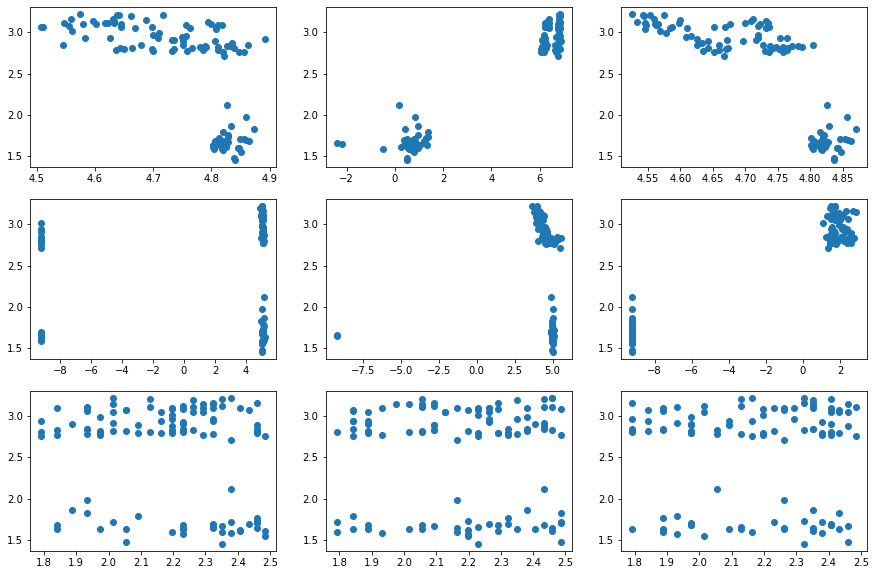

In [50]:
cols=['price','Distribution', 'Share of Features',
       'Share of Display', 'Share of Shelf', 'GRP_TV', 'GRP_Radio',
       'GRP_Newspaper', 'GRP_internet', 'Seasonality', 'competor price',
       'Trade promotion', 'Channel_PHARMACIES', 'Channel_SUPERMARKETS',
       'Channel_TOTAL GROCERIES']
X_train = sales[cols]
y_train = sales['Net Sales']
cols = X_train.columns
fig, axes = plt.subplots(3,3,figsize=(15,10))
for i in range(3):
    for j in range(3):
        col = cols[i*3+j]
        axes[i,j].scatter(X_train[col],y_train)

In [71]:
corr_matrix = X_train.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# print(upper)
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]
print(to_drop)

['Share of Features', 'GRP_TV', 'Channel_SUPERMARKETS', 'Channel_TOTAL GROCERIES']


In [69]:
upper

,price,Distribution,Share of Features,Share of Display,Share of Shelf,GRP_TV,GRP_Radio,GRP_Newspaper,GRP_internet,Seasonality,competor price,Trade promotion,Channel_PHARMACIES,Channel_SUPERMARKETS,Channel_TOTAL GROCERIES
price,NaN,0.554476,0.425670,0.133836,0.037485,0.582772,0.004569,0.043616,0.011930,0.072682,0.213023,0.066539,0.477622,0.097719,0.575342
Distribution,NaN,NaN,0.785902,0.120323,0.190656,0.977115,0.209627,0.041022,0.010205,0.037103,0.217817,0.013551,0.420905,0.562269,0.983174
Share of Features,NaN,NaN,NaN,0.177257,0.061751,0.721596,0.074149,0.012843,0.028383,0.121797,0.122737,0.036532,0.115668,0.866068,0.750400
Share of Display,NaN,NaN,NaN,NaN,0.105797,0.086791,0.028990,0.044472,0.078807,0.070587,0.063400,0.128130,0.042448,0.041165,0.083613
Share of Shelf,NaN,NaN,NaN,NaN,NaN,0.067656,0.088149,0.022410,0.047159,0.217979,0.002919,0.081720,0.119331,0.057419,0.061912
GRP_TV,NaN,NaN,NaN,NaN,NaN,NaN,0.203807,0.064869,0.006781,0.051082,0.230084,0.000864,0.540771,0.457129,0.997900
GRP_Radio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.124982,0.046592,0.015278,0.246526,0.060609,0.172930,0.031486,0.204415
GRP_Newspaper,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.065762,0.021738,0.129327,0.017195,0.194775,0.141140,0.053635
GRP_internet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.152226,0.127489,0.058408,0.006863,0.021932,0.015069
Seasonality,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.040880,0.095078,0.119475,0.171029,0.051555


In [84]:
X = sales.drop('Net Sales',axis=1)
y = sales['Net Sales']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)
X_test.fillna(0,inplace=True)
X_train_0 = sm.add_constant(X_train)
X_test_0 = sm.add_constant(X_test)
ols = sm.OLS(endog=y_train,exog=X_train_0).fit()
print(ols.summary())
y_pred_ols = ols.predict(X_test_0)
mse = mean_squared_error(y_test,y_pred_ols)
print(mse)

                            OLS Regression Results                            
Dep. Variable:              Net Sales   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     166.1
Date:                Fri, 19 Mar 2021   Prob (F-statistic):           1.75e-42
Time:                        20:19:16   Log-Likelihood:                 67.764
No. Observations:                  75   AIC:                            -105.5
Df Residuals:                      60   BIC:                            -70.77
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [81]:
X_train_0

,const,Channel,price,Distribution,Share of Features,Share of Display,Share of Shelf,GRP_TV,GRP_Radio,GRP_Newspaper,GRP_internet,Seasonality,competor price,Trade promotion
61,1.0,SUPERMARKETS,102.79,936.97,94.18,152.13,53.67,14.91,28.0,26.0,23.0,0.14,108,101
82,1.0,TOTAL GROCERIES,123.69,1.85,123.58,0.00,138.59,0.00,34.0,33.0,37.0,0.47,107,119
21,1.0,PHARMACIES,102.19,493.91,112.16,159.45,86.71,36.51,34.0,21.0,21.0,0.45,113,101
6,1.0,PHARMACIES,127.50,490.66,114.06,0.00,159.69,20.00,20.0,21.0,40.0,0.10,110,115
41,1.0,SUPERMARKETS,107.64,873.54,105.59,0.00,76.50,11.45,23.0,38.0,22.0,0.24,113,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,1.0,PHARMACIES,104.02,579.68,112.49,147.06,86.54,11.90,34.0,32.0,35.0,0.55,139,116
64,1.0,SUPERMARKETS,116.34,914.41,94.30,154.01,50.08,19.36,23.0,23.0,37.0,0.16,124,103
15,1.0,PHARMACIES,105.99,477.65,114.77,159.19,116.40,40.00,20.0,20.0,24.0,0.21,104,101
100,1.0,TOTAL GROCERIES,125.11,3.43,124.82,155.47,146.01,0.00,35.0,27.0,39.0,0.11,131,108


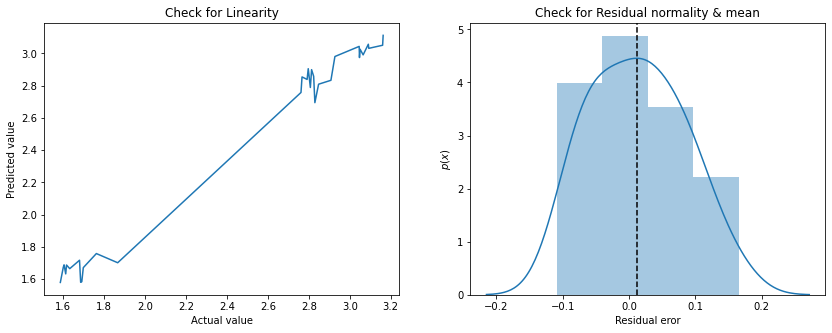

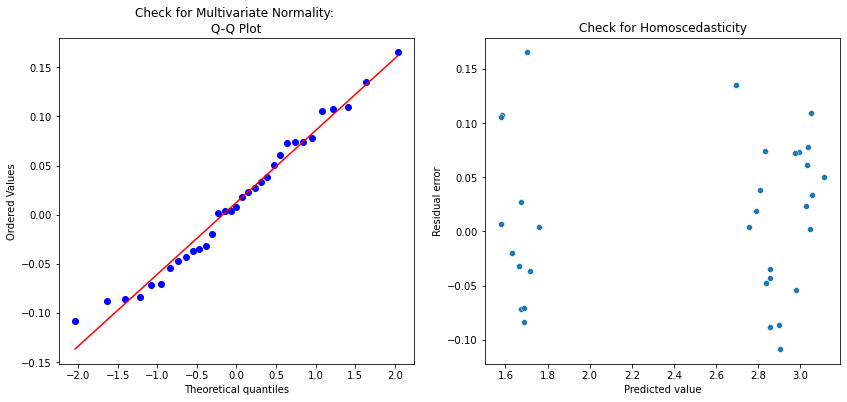

In [86]:
import seaborn as sns
# Check for Linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.lineplot(y_test,y_pred_ols,ax=ax)
plt.title('Check for Linearity')
plt.xlabel('Actual value')
plt.ylabel('Predicted value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.distplot(y_test-y_pred_ols,ax=ax)
plt.axvline((y_test - y_pred_ols).mean(),color='k',linestyle='--')
plt.title('Check for Residual normality & mean')
plt.xlabel('Residual eror')
plt.ylabel('$p(x)$');

# Check for Multivariate Normality
# Quantile-Quantile plot 
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_pred_ols),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(y=(y_test-y_pred_ols),x=y_pred_ols,ax=ax[1])
ax[1].set_title('Check for Homoscedasticity')
plt.xlabel('Predicted value')
plt.ylabel('Residual error');
